In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Data_Test.xlsx")

In [3]:
df_train.shape

(6237, 9)

In [4]:
df_test.shape

(1560, 8)

In [5]:
df = [df_train, df_test]
  
df_books = pd.concat(df)

In [6]:
df_books.shape

(7797, 9)

In [7]:
df_books.reset_index(inplace = True, drop = True)

In [8]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 548.4+ KB


In [9]:
df_books.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,7797,6787,Complete Guide to Digital Photography,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Author,7797,4372,Agatha Christie,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edition,7797,3882,"Paperback,– 5 Oct 2017",60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviews,7797,36,5.0 out of 5 stars,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ratings,7797,368,1 customer review,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Synopsis,7797,6771,A Tinkle Double Digest is two Tinkle Digests i...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,7797,363,Action & Adventure (Books),1183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BookCategory,7797,11,Action & Adventure,1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,6237.0,NaN,NaN,NaN,560.707516,690.110657,25.0,249.18,373.0,599.0,14100.0


In [10]:
df_books.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [11]:
duplicate = df_books[df_books.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
7327,The Rustlers of the West Fork (Hopalong Cassidy),Louis L'Amour,"Mass Market Paperback,– 1 Apr 1992",5.0 out of 5 stars,2 customer reviews,"In this first of four classic frontier novels,...",Action & Adventure (Books),Action & Adventure,NaN
7332,The Princess Bride: S. Morgenstern's Classic T...,William Goldman,"Mass Market Paperback,– 26 Mar 2010",3.8 out of 5 stars,6 customer reviews,William Goldman's modern fantasy classic is a ...,Action & Adventure (Books),Action & Adventure,NaN
7340,Everybody Lies: The New York Times Bestseller,Seth Stephens-Davidowitz,"Paperback,– 18 Apr 2018",4.3 out of 5 stars,27 customer reviews,THE NEW YORK TIMES BESTSELLER\nAN ECONOMIST BO...,Political Structure & Processes (Books),Action & Adventure,NaN
7490,Flint,Louis L'Amour,"Mass Market Paperback,– 3 Nov 1997",4.3 out of 5 stars,4 customer reviews,"He left the West at the age of seventeen, leav...",Action & Adventure (Books),Action & Adventure,NaN
7553,The Five Greatest Warriors (Jack West Series),Matthew Reilly,"Paperback,– 25 Nov 2010",4.4 out of 5 stars,12 customer reviews,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure,NaN
7577,Alita: Battle Angel – The Official Movie Novel...,Pat Cadigan,"Paperback,– 14 Feb 2019",3.9 out of 5 stars,7 customer reviews,The ofﬁcial novelization to the highly anticip...,Action & Adventure (Books),Action & Adventure,NaN
7644,The Curious Incident of the Dog in the Night-t...,Mark Haddon,"Paperback,– 2 Aug 2012",4.0 out of 5 stars,96 customer reviews,A Children’s Bookshelf Selection: Each month o...,Action & Adventure (Books),Action & Adventure,NaN
7690,Storm and Silence: Volume 1 (Storm and Silence...,Robert Thier,"Paperback,– 19 Mar 2016",5.0 out of 5 stars,59 customer reviews,Freedom - that is what Lilly Linton wants most...,Action & Adventure (Books),Action & Adventure,NaN


In [12]:
### Examine missing values
df_na = df_books.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Price    1560
dtype: int64

In [13]:
df_books.isnull().sum().sort_values(ascending = False)/df_train.index.size

Price           0.25012
Title           0.00000
Author          0.00000
Edition         0.00000
Reviews         0.00000
Ratings         0.00000
Synopsis        0.00000
Genre           0.00000
BookCategory    0.00000
dtype: float64

In [14]:
df_books['Reviews'] = df_books['Reviews'].str[:3]

In [15]:
df_books

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
7792,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",NaN
7793,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts",NaN
7794,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour,NaN
7795,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",NaN


In [16]:
df_books.Reviews.value_counts()

5.0    1751
4.0     713
4.5     626
4.6     491
4.4     488
4.3     450
4.7     412
4.2     406
4.1     381
3.9     300
4.8     272
3.8     239
3.7     203
3.0     176
3.6     145
3.5     143
4.9      99
3.4      92
3.3      74
1.0      65
3.1      57
3.2      50
2.0      44
2.9      36
2.5      23
2.7      18
2.8      12
2.3       7
1.5       6
2.6       5
2.4       5
2.2       3
1.4       2
1.6       1
1.7       1
2.1       1
Name: Reviews, dtype: int64

<ipython-input-17-7bf1f9e9ab5b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


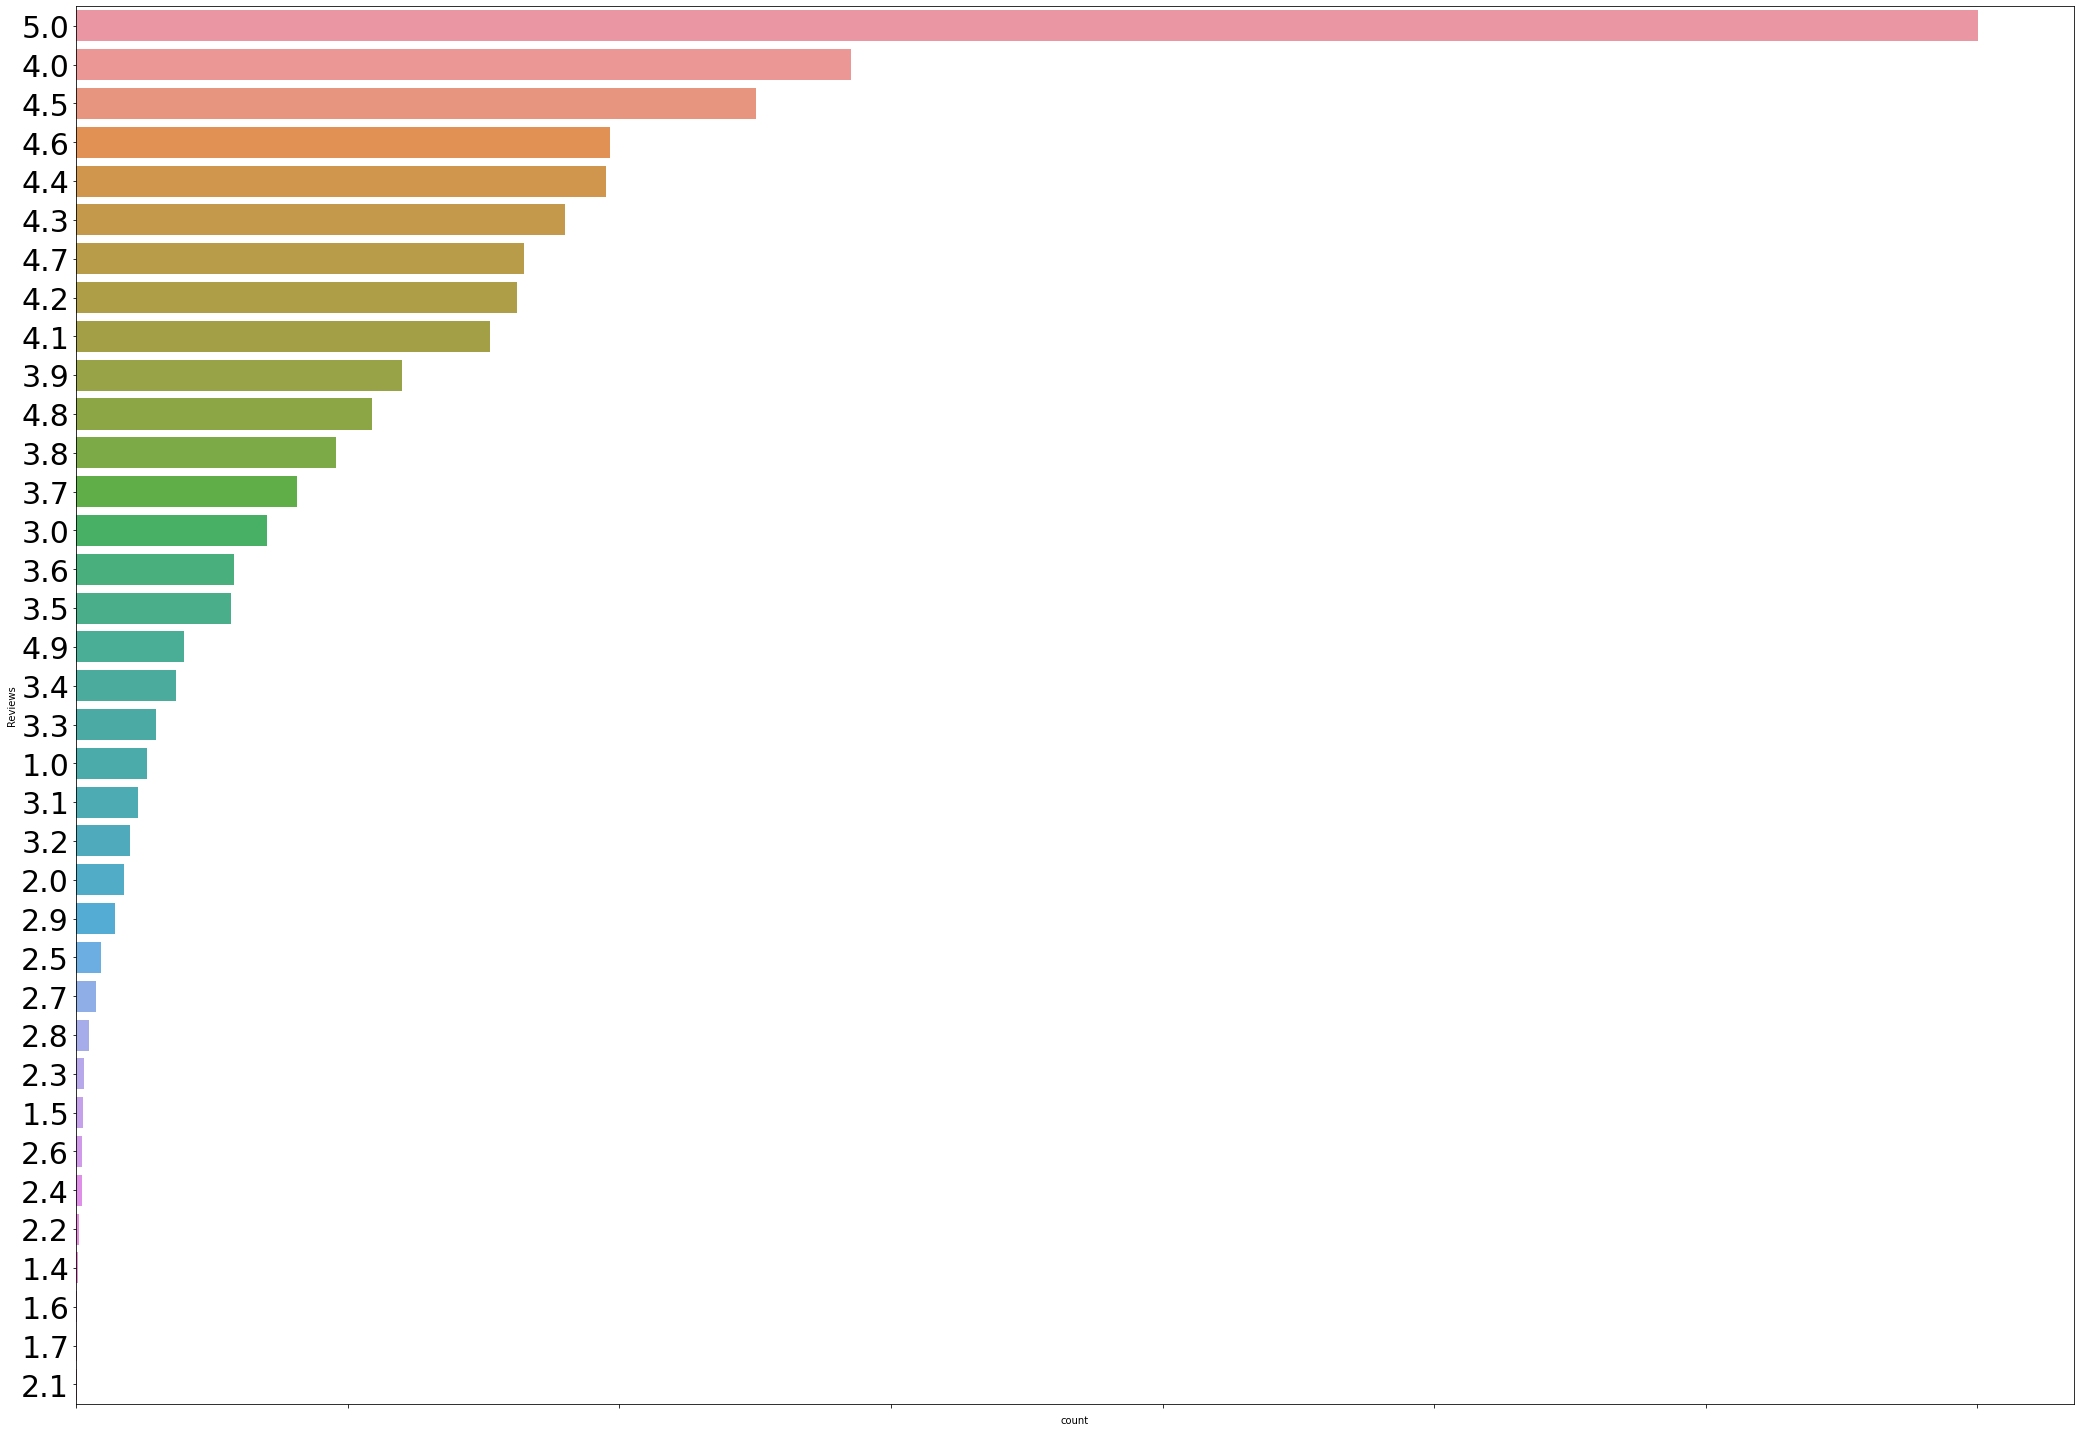

In [17]:
plt.figure(figsize=(29,20))
ax = sns.countplot(y="Reviews", data=df_books, order = df_books['Reviews'].value_counts().index)
plt.yticks(fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")



plt.tight_layout()
plt.show()

In [18]:
df_books['Ratings'] = df_books['Ratings'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [19]:
df_books.BookCategory.value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

In [20]:
#df_train["Print"]=np.where(df_train["Edition"].str.contains(r'Paperback'),'Paperback','Hardcover')
df_books[['Print2', 'Date']] = df_books['Edition'].str.split(',–', 1, expand=True)

In [21]:
df_books['Year'] = df_books['Edition'].str[-4:]

In [22]:
df_books.Print2.value_counts()

Paperback                6458
Hardcover                1056
Mass Market Paperback     200
Sheet music                32
Flexibound                 19
Cards                       9
Spiral-bound                6
Tankobon Softcover          3
Loose Leaf                  3
Library Binding             1
Product Bundle              1
Leather Bound               1
(German),Paperback          1
Plastic Comb                1
Board book                  1
(French),Paperback          1
(Kannada),Paperback         1
(Chinese),Paperback         1
Perfect Paperback           1
(Spanish),Paperback         1
Name: Print2, dtype: int64

In [23]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_books['Title']= label_encoder.fit_transform(df_books['Title'])
df_books['Author']= label_encoder.fit_transform(df_books['Author'])
df_books['Edition']= label_encoder.fit_transform(df_books['Edition'])
df_books['Genre']= label_encoder.fit_transform(df_books['Genre'])
df_books['BookCategory']= label_encoder.fit_transform(df_books['BookCategory'])
df_books['Print2']= label_encoder.fit_transform(df_books['Print2'])
df_books['Year']= label_encoder.fit_transform(df_books['Year'])




In [24]:
df_books.drop('Synopsis', axis=1, inplace=True)
df_books.drop('Date', axis=1, inplace=True)


In [25]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   int32  
 1   Author        7797 non-null   int32  
 2   Edition       7797 non-null   int32  
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   int32  
 5   Genre         7797 non-null   int32  
 6   BookCategory  7797 non-null   int32  
 7   Price         6237 non-null   float64
 8   Print2        7797 non-null   int32  
 9   Year          7797 non-null   int32  
dtypes: float64(1), int32(8), object(1)
memory usage: 365.6+ KB


In [26]:
df_books['Reviews'] = pd.to_numeric(df_books['Reviews'], errors='coerce')

In [27]:
Q1 = df_books.quantile(0.25)
Q3 = df_books.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [28]:
((df_books > UL) | (df_books < LL)).sum()

Title              0
Author             0
Edition            0
Reviews          193
Ratings          978
Genre              0
BookCategory       0
Price            597
Print2          1339
Year             554
dtype: int64

In [29]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_books[column].describe(),end=' ')
    
    
    plt.figure(figsize=(4,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.hist(x=df_books[column])
    plt.show()
    
    plt.figure(figsize=(4,4))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_books[column])

    plt.show()

In [30]:
df_num2 = df_books.select_dtypes(include = ['float64', 'int64','int32'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

10

Description of Title
----------------------------------------------------------------------------
count    7797.000000
mean     3387.384763
std      1970.556159
min         0.000000
25%      1667.000000
50%      3398.000000
75%      5097.000000
max      6786.000000
Name: Title, dtype: float64 Distribution of Title
----------------------------------------------------------------------------


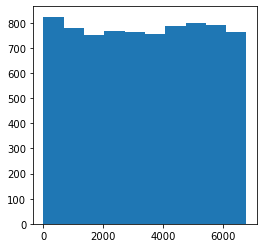

BoxPlot of Title
----------------------------------------------------------------------------


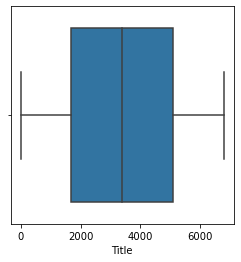

Description of Author
----------------------------------------------------------------------------
count    7797.000000
mean     2148.142875
std      1257.563270
min         0.000000
25%      1079.000000
50%      2136.000000
75%      3226.000000
max      4371.000000
Name: Author, dtype: float64 Distribution of Author
----------------------------------------------------------------------------


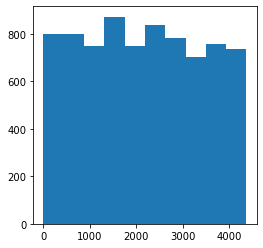

BoxPlot of Author
----------------------------------------------------------------------------


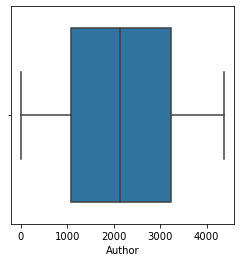

Description of Edition
----------------------------------------------------------------------------
count    7797.000000
mean     2010.421059
std      1030.025496
min         0.000000
25%      1176.000000
50%      2038.000000
75%      2863.000000
max      3881.000000
Name: Edition, dtype: float64 Distribution of Edition
----------------------------------------------------------------------------


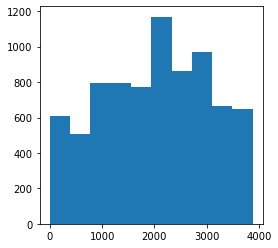

BoxPlot of Edition
----------------------------------------------------------------------------


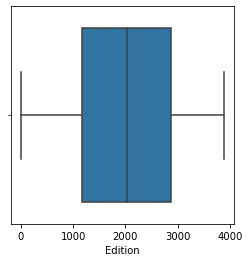

Description of Reviews
----------------------------------------------------------------------------
count    7797.000000
mean        4.295845
std         0.663513
min         1.000000
25%         4.000000
50%         4.400000
75%         4.800000
max         5.000000
Name: Reviews, dtype: float64 Distribution of Reviews
----------------------------------------------------------------------------


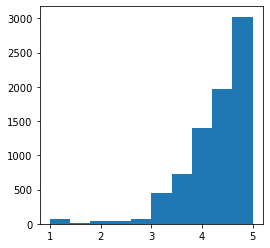

BoxPlot of Reviews
----------------------------------------------------------------------------


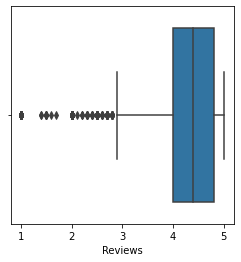

Description of Ratings
----------------------------------------------------------------------------
count    7797.000000
mean       35.520841
std       153.020897
min         1.000000
25%         2.000000
50%         6.000000
75%        21.000000
max      6090.000000
Name: Ratings, dtype: float64 Distribution of Ratings
----------------------------------------------------------------------------


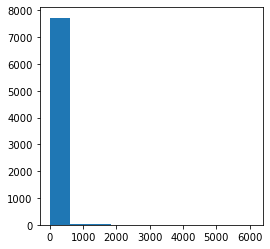

BoxPlot of Ratings
----------------------------------------------------------------------------


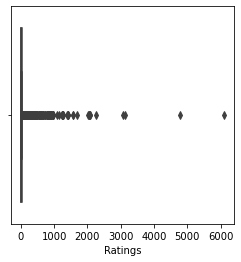

Description of Genre
----------------------------------------------------------------------------
count    7797.000000
mean      142.654867
std       109.199704
min         0.000000
25%        35.000000
50%       109.000000
75%       227.000000
max       362.000000
Name: Genre, dtype: float64 Distribution of Genre
----------------------------------------------------------------------------


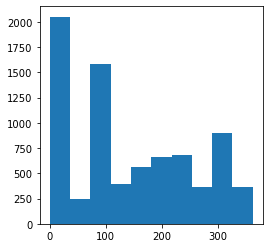

BoxPlot of Genre
----------------------------------------------------------------------------


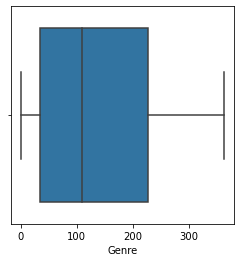

Description of BookCategory
----------------------------------------------------------------------------
count    7797.000000
mean        4.635244
std         3.185005
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: BookCategory, dtype: float64 Distribution of BookCategory
----------------------------------------------------------------------------


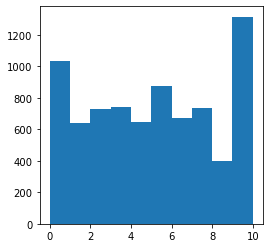

BoxPlot of BookCategory
----------------------------------------------------------------------------


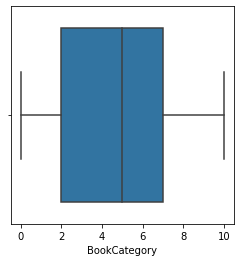

Description of Price
----------------------------------------------------------------------------
count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64 Distribution of Price
----------------------------------------------------------------------------


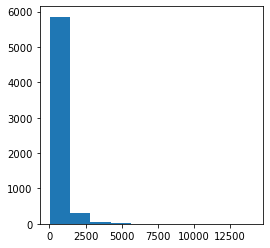

BoxPlot of Price
----------------------------------------------------------------------------


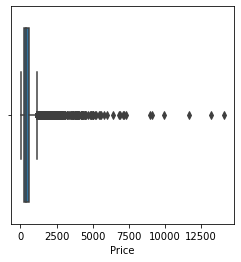

Description of Print2
----------------------------------------------------------------------------
count    7797.000000
mean       12.288060
std         1.800498
min         0.000000
25%        13.000000
50%        13.000000
75%        13.000000
max        19.000000
Name: Print2, dtype: float64 Distribution of Print2
----------------------------------------------------------------------------


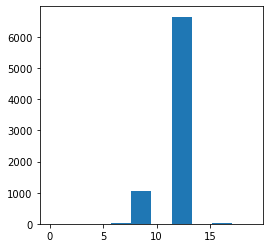

BoxPlot of Print2
----------------------------------------------------------------------------


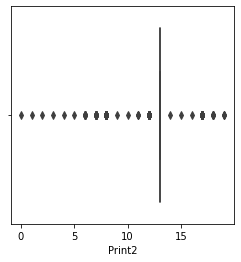

Description of Year
----------------------------------------------------------------------------
count    7797.000000
mean       50.913300
std         7.751822
min         0.000000
25%        49.000000
50%        54.000000
75%        56.000000
max        66.000000
Name: Year, dtype: float64 Distribution of Year
----------------------------------------------------------------------------


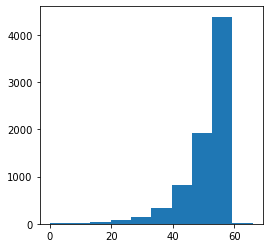

BoxPlot of Year
----------------------------------------------------------------------------


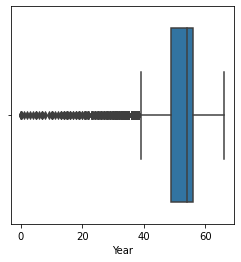

In [31]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:>

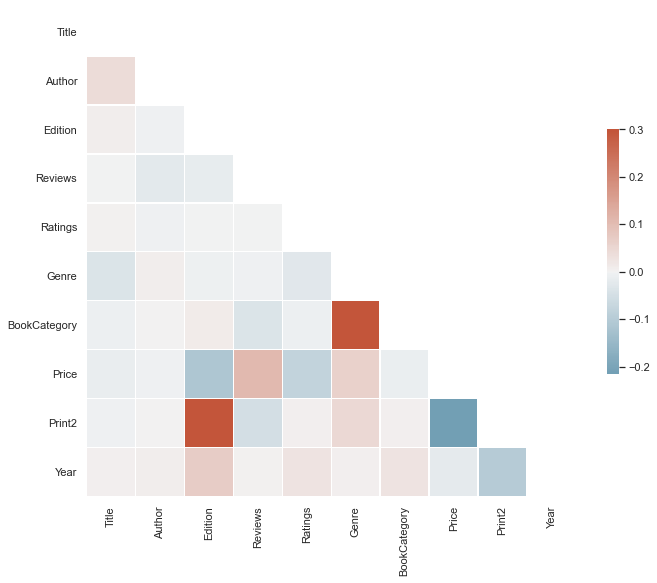

In [32]:
#sns.heatmap(df_imputed.corr(),annot=True);
#ax = sns.heatmap(df_imputed.corr(), annot=True, fmt="f")


from string import ascii_letters


sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_books.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

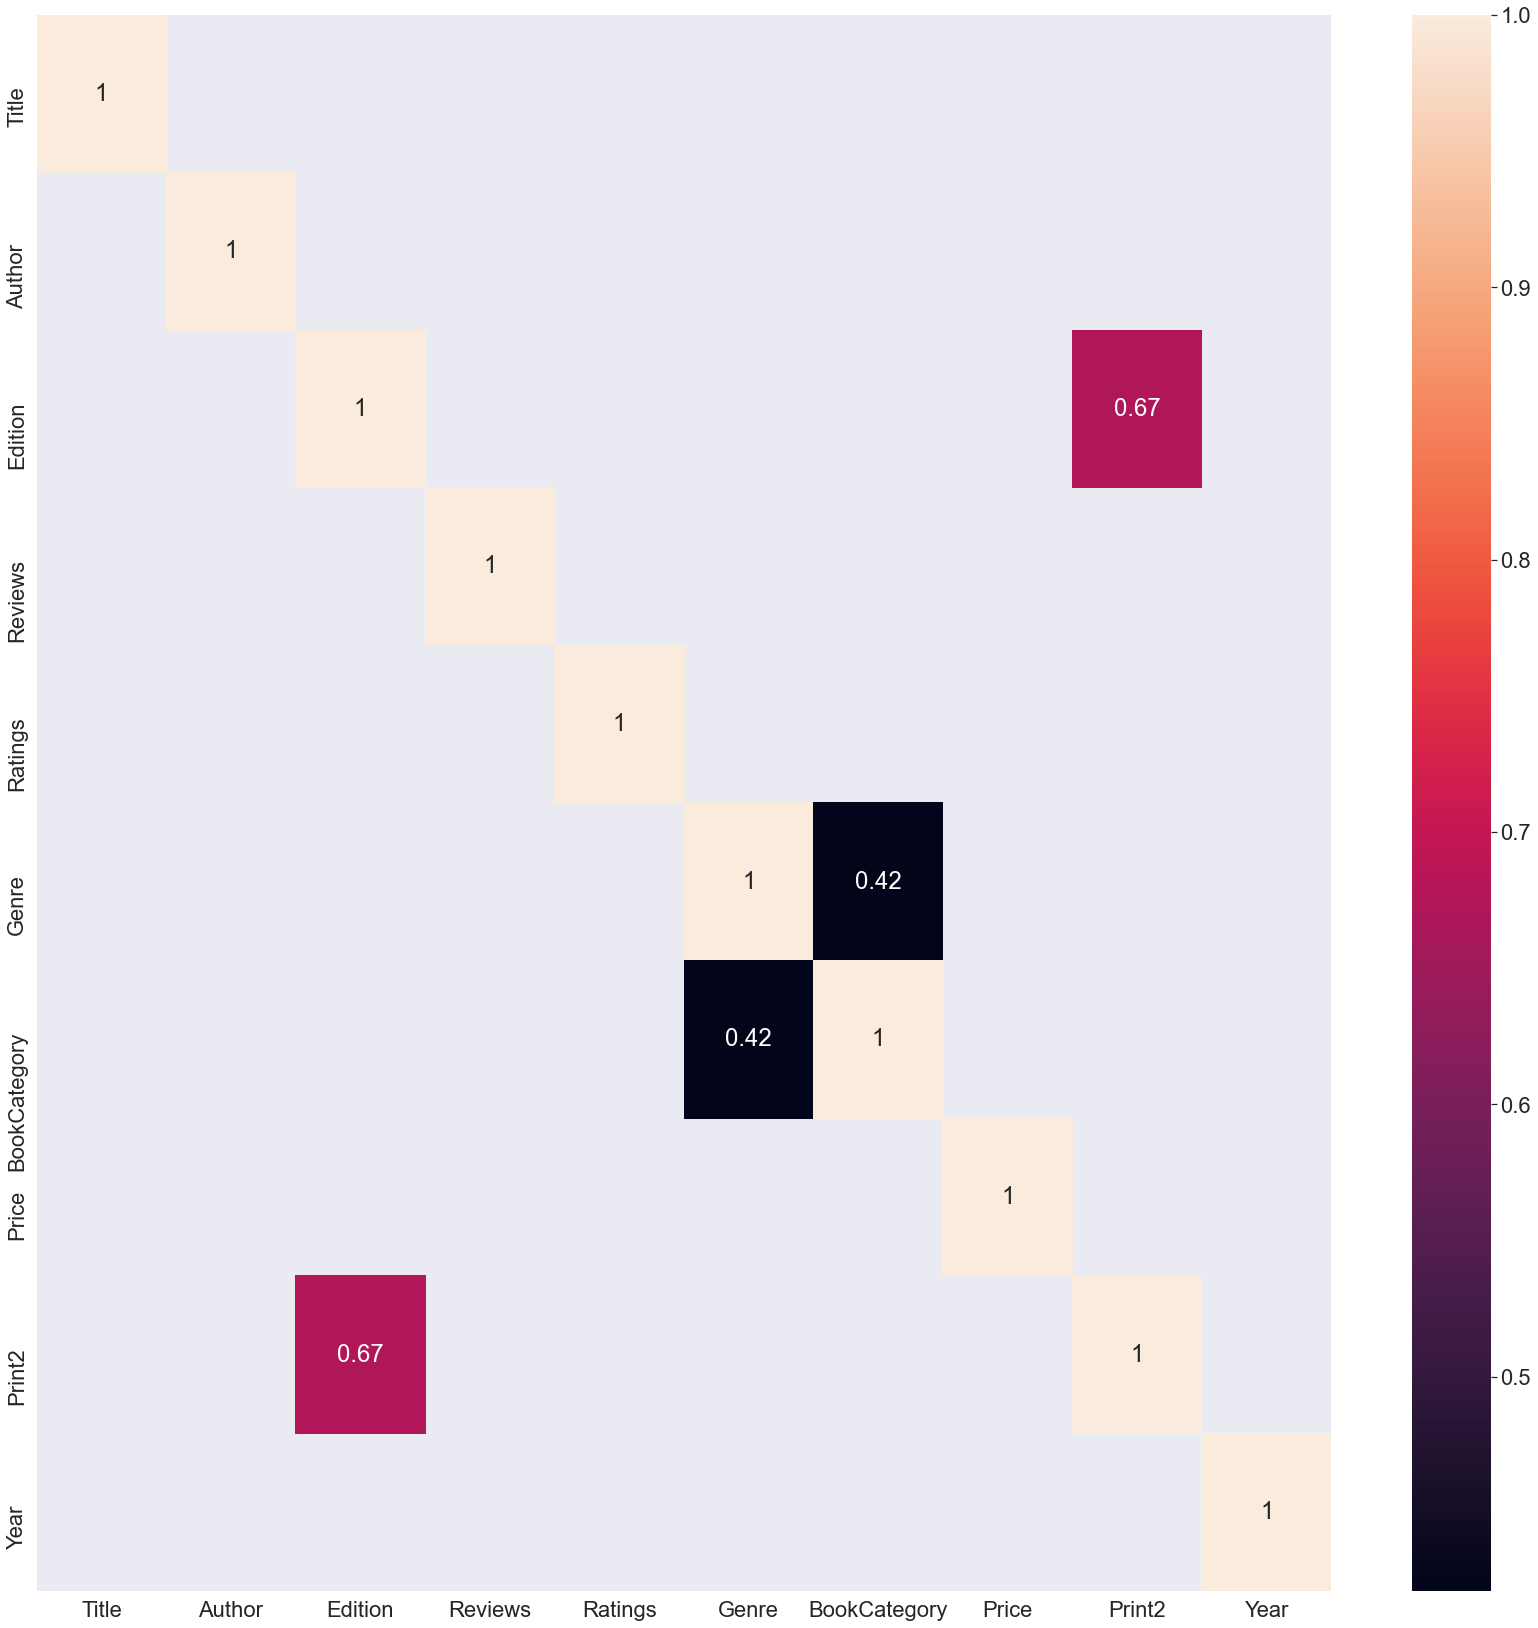

In [33]:
#calculate column correlations and make a seaborn heatmap - Before standardisation
corr = df_books.corr()
kot = corr[corr>=0.4]
plt.figure(figsize=(29,29))
#p.set(font_scale=2)
# setting the size of figure to 12 by 10
#p=sns.heatmap(kot, annot=True,square=True,annot_kws={'size':16})
#sns.color_palette("light:#5A9", as_cmap=True)
sns.set(font_scale=2)
heat_map = sns.heatmap(kot, annot=True)
plt.show()


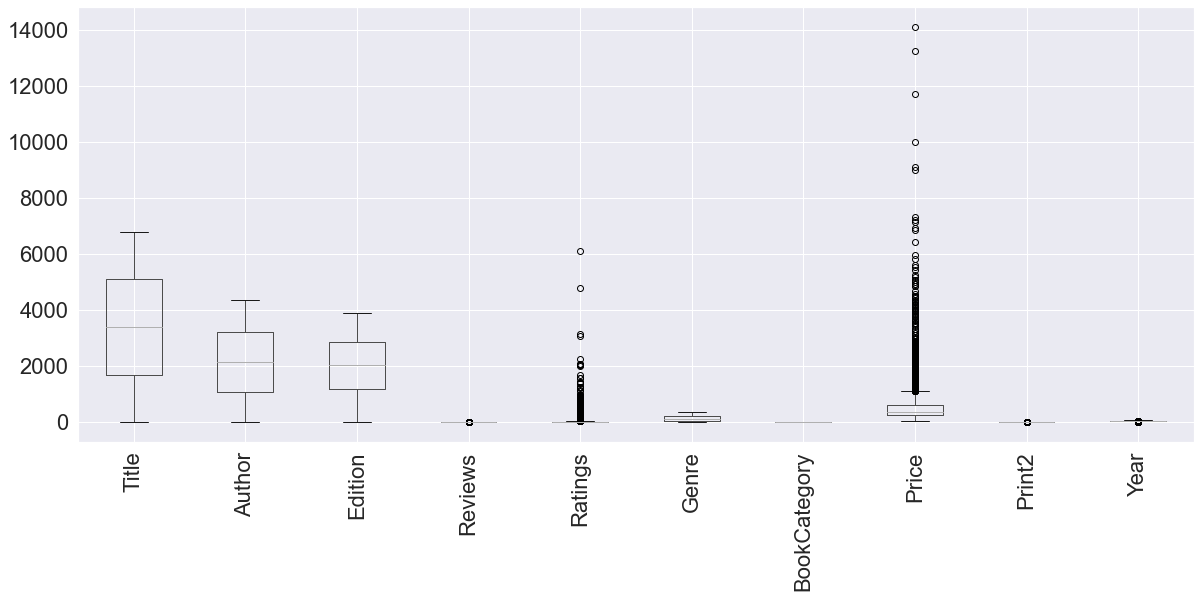

In [34]:
df_books.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [35]:
df_books

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price,Print2,Year
0,5803,748,1231,4.0,8,1,0,220.00,13,55
1,2120,370,3164,3.9,14,78,2,202.93,13,51
2,2982,4045,2272,4.8,6,202,6,299.00,13,21
3,189,79,3000,4.1,13,96,5,180.00,13,56
4,2853,1138,99,5.0,1,264,1,965.62,8,45
...,...,...,...,...,...,...,...,...,...,...
7792,16,3935,1438,5.0,4,103,4,NaN,13,50
7793,3313,27,3222,3.6,13,72,2,NaN,13,52
7794,5483,2159,3086,4.0,5,186,6,NaN,13,50
7795,3810,1517,2135,3.5,3,347,2,NaN,13,48


In [36]:
df_train = df_books.iloc[:6237,:]
df_test = df_books.iloc[6237:,:]

In [37]:
df_train.shape

(6237, 10)

In [38]:
df_test.shape

(1560, 10)

In [39]:
# Copy all the predictor variables into X dataframe
X_train = df_train.drop('Price', axis=1)

# Copy target into the y dataframe.  
y_train = df_train['Price']

In [40]:
X_test = df_test.drop('Price', axis=1)

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [42]:
model.feature_importances_

array([0.11025005, 0.11699838, 0.14731957, 0.0935931 , 0.09940545,
       0.12101228, 0.10858232, 0.07265841, 0.13018042])

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [44]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor() 
hyp = RandomizedSearchCV(estimator = model,
                        param_distributions=grid,
                        n_iter=10,
                       scoring= 'neg_mean_squared_error',
                        cv=5,verbose = 2,
                        random_state = 42,n_jobs = 1) 
hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
y_pred = hyp.predict(X_test)
y_pred

array([ 320.20532588, 1311.22451   ,  555.67991887, ...,  501.07852535,
        490.85772698,  661.24099944])

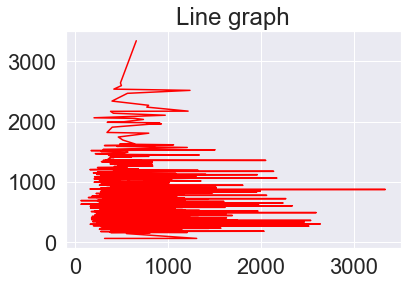

In [47]:
x = y_pred
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()

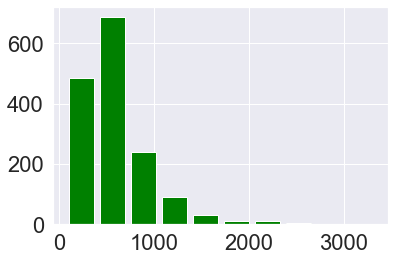

In [48]:
plt.hist(y_pred, color = 'green',
        histtype = 'bar', rwidth = 0.8)
plt.show()

In [49]:
array = y_pred
dataframe = pd.DataFrame(array) 
#dataframe.to_csv(r"C:\Users\athisya\Downloads\Great Learning\hackathon\Predict The Price Of Books\Participants_Data\data1.csv")

In [50]:
#res["Survived"] = pd.DataFrame(ytest_predict)

res = pd.DataFrame(y_pred)
res.columns = ["Price"]


In [51]:
res

,Price
0,320.205326
1,1311.224510
2,555.679919
3,812.172076
4,386.551045
...,...
1555,1239.386616
1556,419.737573
1557,501.078525
1558,490.857727


In [52]:
#res.set_index('Price')
res = res.set_index('Price')
res.to_csv("prediction_results.csv")

In [53]:
res

""
Price
320.205326
1311.224510
555.679919
812.172076
386.551045
...
1239.386616
419.737573
501.078525
